# K-Means Clustering

> Clustering helps uncover hidden patterns, revealing if people from certain regions share income levels or if professions have unique spending habits, aiding better decision-making and personalization.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


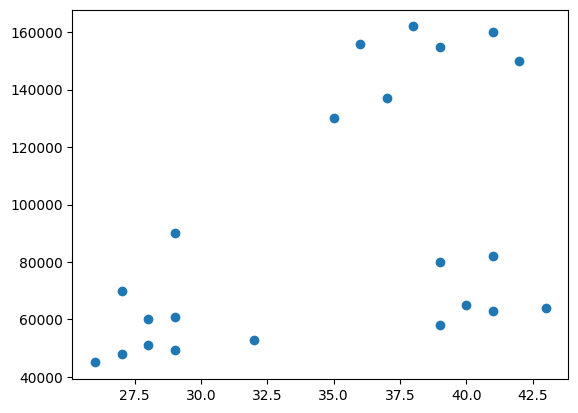

In [3]:
plt.scatter(df.Age, df['Income($)'])

**Applying K-Means Clustering *(we assume there are 3 natural groups in the data)*:**

In [4]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

**Fitting K-Means on Age and Income & Predicting the Cluster for Each Data Point:**

In [5]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

**Adding a New Column (`cluster`) to Store the Cluster Labels:**

In [6]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


**Visualizing Clusters:**

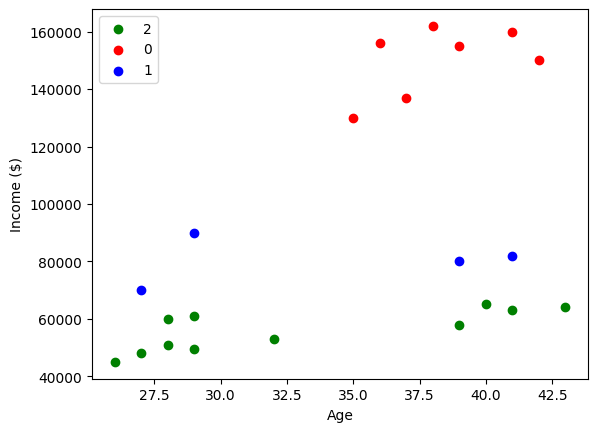

In [7]:
df_0 = df[df.cluster == 0]
df_1 = df[df.cluster == 1]
df_2 = df[df.cluster == 2]

plt.scatter(df_0.Age, df_0['Income($)'], color='g')
plt.scatter(df_1.Age, df_1['Income($)'], color='r')
plt.scatter(df_2.Age, df_2['Income($)'], color='b')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend(df.cluster.unique())

As seen in the scatter plot, the data points are not correctly grouped. The clustering issue arises because the X and Y axes are on different scales.

To fix this, we need to do some preprocessing to bring them on the same scale.

**Feature Scaling with Min-Max Normalization *(so they have the same weight during clustering. Because K-Means is sensitive to scale, and `income` values are much larger than `ages`)*:**

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


**Reapplying K-Means After Scaling:**

In [9]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32)

**Updating the Cluster Labels:**

In [10]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


**Finding the Cluster Centers (centroids):**

In [11]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

**Plotting Clusters with Centroids:**

  `km.cluster_centers_[:, 0]` : Selects the first column, which represents the x-coordinates (Age).

  `km.cluster_centers_[:, 1]` : Selects the second column, which represents the y-coordinates (Income).

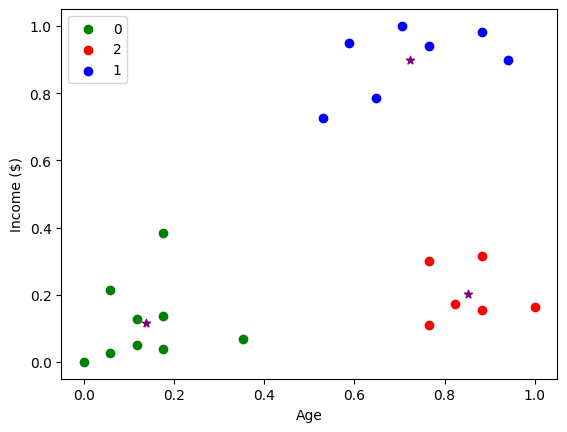

In [12]:
df_0 = df[df.cluster == 0]
df_1 = df[df.cluster == 1]
df_2 = df[df.cluster == 2]

plt.scatter(df_0.Age, df_0['Income($)'], color='g')
plt.scatter(df_1.Age, df_1['Income($)'], color='r')
plt.scatter(df_2.Age, df_2['Income($)'], color='b')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend(df.cluster.unique())

**Finding the Optimal Number of Clusters (Elbow Method):**

In [13]:
k_rng = range(1,10)
sse = []
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['Age', 'Income($)']])
  sse.append(km.inertia_)

In [14]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.3297882038716433,
 0.21733935105456417,
 0.18311629202780538,
 0.16070312910285703,
 0.11793228590762087]

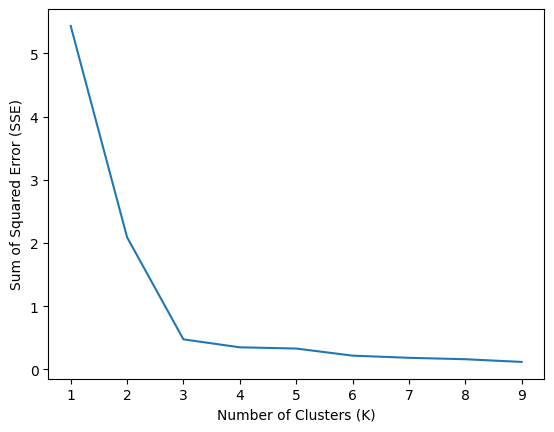

In [15]:
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.plot(k_rng, sse)